# Importing the whole dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer

true = pd.read_csv('../raw_data/True.csv')
fake = pd.read_csv('../raw_data/Fake.csv')

In [2]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Dropping columns

In [3]:
true.drop(columns = ['date', 'subject'], inplace = True)
fake.drop(columns = ['date', 'subject'], inplace = True)

## Adding a score, moving to a binay classification problem

In [4]:
true['score']=1
fake['score']=0

## Concatenating datasets

In [5]:
data = pd.concat([true,fake], ignore_index=True)

# Preprocessing

In [6]:
stop_words =['/Getty Images']
pat = '|'.join(r"\b{}\b".format(x) for x in stop_words)
data['text'] = data['text'].str.replace(pat, '')

In [7]:
data_copy = data.copy()

In [9]:
import string


count = lambda l1,l2: sum([1 for x in l1 if x in l2])
data_copy['title_punc'] = data_copy.title.apply(lambda s: count(s, string.punctuation))

In [19]:
data_copy['text_punc'] = data_copy.text.apply(lambda s: count(s, string.punctuation))

In [20]:
data_copy['title'][1]

'U.S. military to accept transgender recruits on Monday: Pentagon'

In [32]:
data_copy['title_Upper'] = data_copy['title'].str.count(r'[A-Z]')
data_copy['text_Upper'] = data_copy['text'].str.count(r'[A-Z]')

In [33]:
data_copy.head()

,title,text,score,title_punc,title_upper,text_upper,text_punc,title_num,text_num,title_Upper,text_Upper
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,3,4,155,118,0,33,4,155
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,3,4,119,77,0,16,4,119
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,6,7,117,47,0,8,7,117
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,2,8,110,51,0,10,8,110
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,2,4,200,136,0,62,4,200


In [34]:
def count_digits(string):
    return sum(item.isdigit() for item in string)

data_copy['title_num'] = data_copy['title'].apply(count_digits)
data_copy.tail()

,title,text,score,title_punc,title_upper,text_upper,text_punc,title_num,text_num,title_Upper,text_Upper
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0,1,13,152,47,0,16,13,152
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0,7,15,69,44,2,10,15,69
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0,1,12,962,534,0,97,12,962
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0,2,9,170,70,3,49,9,170
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,0,2,11,281,149,2,25,11,281


In [35]:
data_copy['text_num'] = data_copy['text'].apply(count_digits)

In [36]:
data_copy['text_num'][44896]

49

In [37]:
data_copy.head()

,title,text,score,title_punc,title_upper,text_upper,text_punc,title_num,text_num,title_Upper,text_Upper
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,3,4,155,118,0,33,4,155
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,3,4,119,77,0,16,4,119
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,6,7,117,47,0,8,7,117
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,2,8,110,51,0,10,8,110
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,2,4,200,136,0,62,4,200


In [38]:
data_copy = data_copy[['title', 'text','title_punc', 'text_punc', 'title_Upper',
                       'text_Upper', 'title_num', 'text_num','score']]

In [39]:
data_copy.head()

,title,text,title_punc,text_punc,title_Upper,text_Upper,title_num,text_num,score
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,3,118,4,155,0,33,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,3,77,4,119,0,16,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,6,47,7,117,0,8,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,2,51,8,110,0,10,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,2,136,4,200,0,62,1


# Data Visualization

(array([4.3732e+04, 9.4800e+02, 1.3600e+02, 4.7000e+01, 2.0000e+01,
        4.0000e+00, 8.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  281.6,  563.2,  844.8, 1126.4, 1408. , 1689.6, 1971.2,
        2252.8, 2534.4, 2816. ]),
 <BarContainer object of 10 artists>)

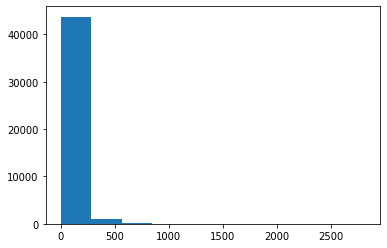

In [40]:
import matplotlib.pyplot as plt


plt.hist(data_copy.text_Upper)

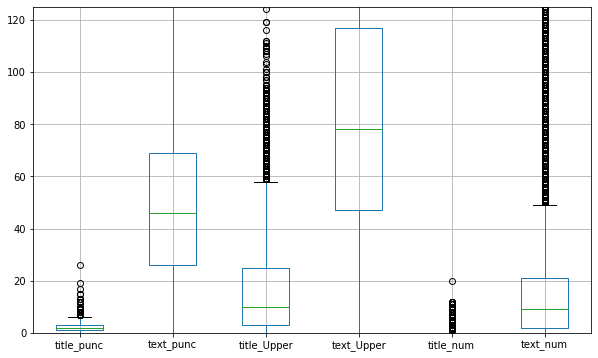

In [59]:
import matplotlib.pyplot as plt
boxplot = data_copy.boxplot(column=['title_punc', 'text_punc', 'title_Upper','text_Upper', 'title_num', 'text_num'], figsize=(10,6))
plt.ylim(0, 125)
plt.show()

# Model pipeline

In [70]:
x = data_copy.drop(columns = 'score')
y = data_copy['score']



In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
preprocessor = ColumnTransformer([
    ('vectorizer_title', CountVectorizer(), 'title'),
    ('vectorizer_text', CountVectorizer(), 'text'),
    ('MinMaxScaler', MinMaxScaler(), ['title_punc', 'text_punc', 'title_Upper', 'text_Upper','title_num', 'text_num'])
])
final_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('nb', MultinomialNB())])

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [75]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'preprocessing__vectorizer_title__ngram_range': ((1,1),(2,2),(3,3)),
    'preprocessing__vectorizer_text__ngram_range': ((1,1),(2,2),(3,3)),
    'nb__alpha': (0.1,1,2,5,10)}
grid_search = GridSearchCV(final_pipe,
                           parameters,
                           scoring = ["f1", "accuracy", "recall"],
                           refit= "accuracy",
                           cv=5,
                           verbose = 1)

In [ ]:
grid_search.fit(x_train,y_train)